### 1. Import Necessary Modules and Import data

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import graphviz
from IPython.display import Image
from sklearn import tree
import pydotplus
from sklearn.externals.six import StringIO

C:\Users\ydzco\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [2]:
data = pd.read_csv('mobileusers.csv')
data.head(10)

,device_id,gender,age,age_group,phone_brand,device_model,timestamps,longitude,latitude
0,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:31:56,113.24,23.19
1,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:32:26,113.24,23.19
2,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:32:54,113.24,23.19
3,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:33:24,113.24,23.19
4,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:33:50,113.24,23.19
5,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:34:16,0.00,0.00
6,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:34:19,113.24,23.19
7,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:34:42,0.00,0.00
8,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:34:54,113.24,23.19
9,-9222956879900151005,M,36,M32-38,三星,Galaxy Note 2,2016-05-06 15:34:58,113.24,23.19


### 2. Data Description

In [8]:
###Check how many columns and datatypes in this datasets, change types if needed
data.shape

(1203537, 9)

In [9]:
data.dtypes

device_id         int64
gender           object
age               int64
age_group        object
phone_brand      object
device_model     object
timestamps       object
longitude       float64
latitude        float64
dtype: object

In [18]:
data['timestamps'] = data['timestamps'].astype('datetime64')

In [15]:
##### Check how many unique ids in this datasets
##### Check how many unique phone_brands in this datasets
##### Check how many males and females
numid = list(data['device_id'].unique())   
len(numid)

23309

In [16]:
numbrand = list(data['phone_brand'].unique())
len(numbrand)

90

In [17]:
data.groupby('gender')['device_id'].nunique()

gender
F     8048
M    15261
Name: device_id, dtype: int64

In [ ]:
##### Null Value Check and Max/Min Value Check

In [19]:
cols = data.columns.to_list()
for i in cols:
    if data[i].isnull().values.any() == True:
        print('The column %25s has null value' %i)
    else:
        print('The column %25s does not have null value' %i )

The column                 device_id does not have null value
The column                    gender does not have null value
The column                       age does not have null value
The column                 age_group does not have null value
The column               phone_brand has null value
The column              device_model has null value
The column                timestamps does not have null value
The column                 longitude does not have null value
The column                  latitude does not have null value


In [20]:
Continues = ['age','timestamps','longitude','latitude']
for i in Continues:
    print ('For the column', i,':')
    print ('The min value of', i, 'is',data[i].min())
    print ('the max value of', i, 'is', data[i].max())
    print('\n')

For the column age :
The min value of age is 11
the max value of age is 89


For the column timestamps :
The min value of timestamps is 2016-04-30 23:52:24
the max value of timestamps is 2016-05-08 00:00:08


For the column longitude :
The min value of longitude is -180.0
the max value of longitude is 151.18


For the column latitude :
The min value of latitude is -33.8
the max value of latitude is 53.64




### 3. Exploratory data analysis

China Mobile Users Age Distribution 

In [22]:
agedata =data.drop_duplicates(subset = ["device_id","gender"])

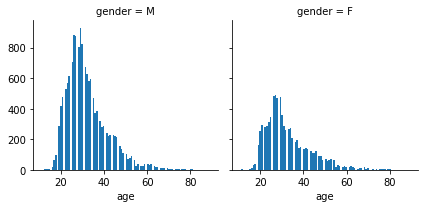

In [23]:
agegraph = sns.FacetGrid(agedata, col='gender')
agegraph.map(plt.hist, 'age', bins=100)

China Mobile Users Brands preference

Text(0.5, 1.0, 'Top 10 Popular Phone Brand')

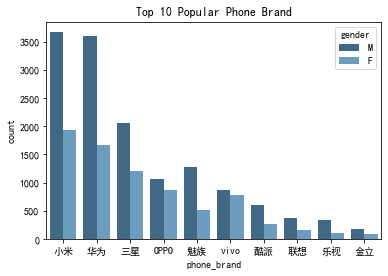

In [24]:
branddata = data.drop_duplicates(subset = ["device_id","phone_brand"])
plt.rcParams['font.sans-serif'] = ['SimHei']  # solve the garbled output issue
plt.rcParams['axes.unicode_minus'] = False 
sns.countplot(x="phone_brand", data=branddata,hue = 'gender'
              , palette="Blues_d",
              order=branddata.phone_brand.value_counts().iloc[:10].index).set_title("Top 10 Popular Phone Brand")

Daily Online Users Trend

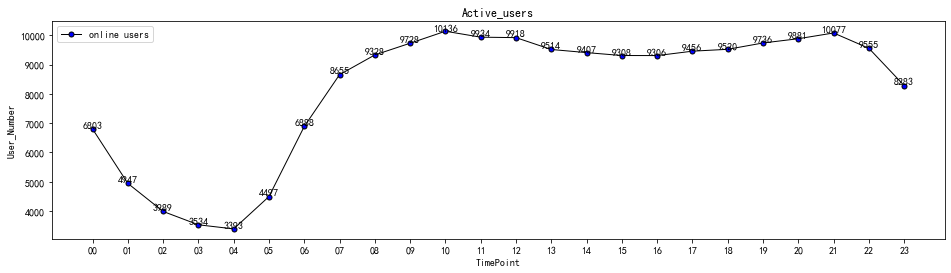

In [25]:
data['Active_timepoint'] = data['timestamps'].apply(lambda x : x.strftime('%H'))
activeuser = data.drop_duplicates(subset = ["device_id","Active_timepoint"])
cnt = activeuser.groupby('Active_timepoint')['device_id'].count()
activeuser_picture = cnt.reset_index()
plt.figure(figsize=(16, 4))
plt.title("Active_users")
plt.plot(activeuser_picture['Active_timepoint'], activeuser_picture['device_id'], label='online users', linewidth=1, color='k', marker='o',
         markerfacecolor='blue', markersize=5)
plt.xlabel('TimePoint')
plt.ylabel('User_Number')
for a, b in zip(activeuser_picture['Active_timepoint'], activeuser_picture['device_id']):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=10)
    
plt.legend()
plt.show()

###  4.  Feature Engineering

In [26]:
data['genderint'] = data.gender.apply(lambda x: 1 if x == 'M' else 0)

In [27]:
data[data['phone_brand'].isna()]

,device_id,gender,age,age_group,phone_brand,device_model,timestamps,longitude,latitude,Active_timepoint,genderint
1057,-9198513807097378193,M,22,M22-,NaN,NaN,2016-05-01 00:46:59,0.0,0.0,00,1
1058,-9198513807097378193,M,22,M22-,NaN,NaN,2016-05-02 00:23:04,0.0,0.0,00,1
1059,-9198513807097378193,M,22,M22-,NaN,NaN,2016-05-02 01:27:09,0.0,0.0,01,1
1060,-9198513807097378193,M,22,M22-,NaN,NaN,2016-05-02 12:03:40,0.0,0.0,12,1
1061,-9198513807097378193,M,22,M22-,NaN,NaN,2016-05-03 15:04:28,0.0,0.0,15,1
...,...,...,...,...,...,...,...,...,...,...,...
1182157,8857408777371994988,M,27,M27-28,NaN,NaN,2016-05-06 17:18:38,0.0,0.0,17,1
1182158,8857408777371994988,M,27,M27-28,NaN,NaN,2016-05-07 18:09:02,0.0,0.0,18,1
1195403,9094512285229743128,M,18,M22-,NaN,NaN,2016-05-07 01:22:43,0.0,0.0,01,1
1195404,9094512285229743128,M,18,M22-,NaN,NaN,2016-05-07 01:25:34,0.0,0.0,01,1


In [28]:
Treedf = data.dropna(subset=['phone_brand', 'device_model'], how='all')

### 5. Decision Tree Model Analysis

With No limitation

In [29]:
factors = ['genderint','age','longitude','latitude']

In [35]:
X = Treedf[factors]
y = Treedf['phone_brand']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.8)
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [36]:
tree_clf.score(X_train,y_train)

0.77492669233304

In [37]:
tree_clf.score(X_test, y_test)

0.7714311932728244

In [38]:
tree_clf.get_depth()

36

Set some limitations

In [39]:
tree_clf2 = DecisionTreeClassifier(max_depth= 10,min_samples_leaf = 10, min_samples_split= 50 )

In [41]:
tree_clf2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=10, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [44]:
tree_clf2.score(X_train,y_train)

0.426845622187092

In [45]:
tree_clf2.score(X_test,y_test)

0.4254037640149493

### 6. Tree Visualization

In [ ]:
dot_data = StringIO()
tree.export_graphviz(tree_clf,out_file = dot_data,feature_names=factors,class_names=np.unique(Treedf['phone_brand'])
                                ,filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue().replace('helvetica','"Microsoft YaHei"'))
Image(graph.create_png())